In [5]:
import os
import pickle
import pandas as pd
import time
import matplotlib.pyplot as plt
import time
  

# from pandas_profiling import ProfileReport

# from sklearn.dummy import DummyClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
# import xgboost

# Helper Functions

In [6]:
from src.pandas_helper import modelReport

# Load Data

In [41]:
X = pd.read_csv('data/Training_set.csv')
y = pd.read_csv('data/Training_labels.csv').status_group

Test_Values = pd.read_csv('data/Test_set.csv')
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [8]:
titles={'baseline_00.sav':'Dummy Classifier',
'knn_gs1.sav':'KNN Classifier - Hypertune',
'knn_model_pipe.sav':'KNN Classifier - Simple',
'log_reg_gs1.sav':'Logistic Regression Classifier - Hypertuned',
'log_reg_pipe.sav':'Logistic Regression Classifier - Simple',
'rfc_gs1.sav':'Random Forest Classifier - Hypertuned',
'rfc_imb_gs1.sav':'Random Forest Classifier - Hypertuned + SMOTE',
'rfc_model_pipe.sav':'Random Forest Classifier - Simple',
'xgbrf_gs1.sav':'XGBoost - Hypertune 1',
'xgbrf_gs2.sav':'XGBoost - Hypertune 2',
'xgbrf_gs3.sav':'XGBoost - Hypertune 3',
'xgbrf_gs4.sav':'XGBoost - Hypertune 4',
'xgbrf_imb_gs1.sav':'XGBRF Classifier - Hypertune + SMOTE 1',
'xgbrf_imb_gs2.sav':'XGBRF Classifier - Hypertune + SMOTE 2',
'XGBRF_model_pipe.sav':'XGBRF Classifier - Simple'}

models={}

for pickle_file in os.listdir('models/'):
    models[titles[str(pickle_file)]] = pickle.load(open(f'models/{pickle_file}', 'rb'))

In [35]:
for title,estimator in models.items():
    fig, ax = plt.subplots(figsize=(10,10))
    
    try:
        mod = estimator.best_estimator_
    except:
        mod = estimator
    
    disp = ConfusionMatrixDisplay.from_estimator(
        mod,
        X_test,
        y_test,
        display_labels=mod.classes_,
        cmap='OrRd',
        normalize='true',
        ax=ax
       ).ax_.set_title(title)
        
    plt.savefig(f'images/normalized_confusion_matrices/{title}.jpg',
                bbox_inches ='tight',
                transparent = False
       )

    plt.clf()
    


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [36]:
for title,estimator in models.items():
    fig, ax = plt.subplots(figsize=(10,10))
    
    try:
        mod = estimator.best_estimator_
    except:
        mod = estimator
        
    disp = ConfusionMatrixDisplay.from_estimator(
        mod,
        X_test,
        y_test,
        display_labels=mod.classes_,
        cmap='OrRd',
        ax=ax
       ).ax_.set_title(title)
        
    plt.savefig(f'images/confusion_matrices/{title}.jpg',
                bbox_inches ='tight',
                transparent = False
       )
    plt.clf()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [37]:
final_model =  pickle.load(open(f'models/xgbrf_gs4.sav', 'rb')).best_estimator_

In [38]:
final_model.fit(X_train, y_train)

[01:18:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ct_cyr',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_sc',
                                                                   MinMaxScaler())]),
                                                  ['construction_year']),
                                                 ('ct_coord',
                                                  Pipeline(steps=[('coord_imp',
                                                                   CoordinatesImputer()),
                                                                  ('coord_sc',
                                                                   MinMaxScaler())]),
                                                  ['latitude', 'longitude',
                           

In [39]:
final_model.score(X_test, y_test)

0.7995286195286195

In [43]:
final_model.fit(X,y)

[01:31:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ct_cyr',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_sc',
                                                                   MinMaxScaler())]),
                                                  ['construction_year']),
                                                 ('ct_coord',
                                                  Pipeline(steps=[('coord_imp',
                                                                   CoordinatesImputer()),
                                                                  ('coord_sc',
                                                                   MinMaxScaler())]),
                                                  ['latitude', 'longitude',
                           

In [44]:
Test_predictions = final_model.predict(Test_Values)

In [45]:
Test_predictions

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [50]:
pd.DataFrame(Test_predictions, columns =['status_group'])

,status_group
0,functional
1,functional
2,functional
3,non functional
4,functional
...,...
14845,non functional
14846,functional
14847,functional
14848,functional


In [52]:
submission = pd.DataFrame(Test_Values.id).join(pd.DataFrame(Test_predictions, columns =['status_group']))


In [63]:
# Timestamp in seconds
ts = int(time.time())

submission.to_csv(f'data/SaadSaeed_{ts}.csv',index=False)

In [64]:
y_train

24947    non functional
22630        functional
13789        functional
15697        functional
22613    non functional
              ...      
54343        functional
38158        functional
860      non functional
15795        functional
56422    non functional
Name: status_group, Length: 44550, dtype: object

<AxesSubplot:>

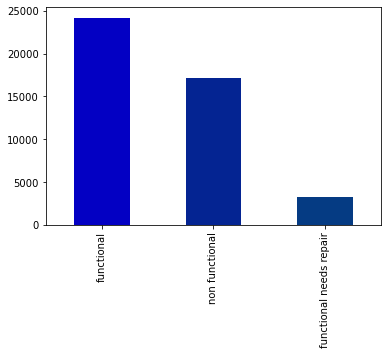